In [2]:
%load_ext autoreload
%autoreload 2
import os
print(os.getcwd())
to_run = True
if to_run:
    os.chdir('..')
    to_run = False
print(os.getcwd())

/workspaces/REBS/Mandatory Assignment 1/pm4py-dcr-feature-dcr_in_pm4py_revised/notebooks
/workspaces/REBS/Mandatory Assignment 1/pm4py-dcr-feature-dcr_in_pm4py_revised


# Group Details

**Group ID:** 10 

**Group name:** Mandatory Assignments 10

**Group members that contributed to the assignment (full name):** Frederik Dalgaard Christensen, Tarik Yorulmaz


# Part 1


Consider the following activities extracted from the Dreyers log introduced and examined in the paper The Analysis of a Real Life Declarative Process:

```python
Fill out application
Architect Review
Lawyer Review
Reject
Applicant informed
Change phase to Abort
Change Phase to Payout
First payment
Undo payment 
Change Phase to End Report
Account number changed
Approve changed account 
Execute abandon
Change phase to Abandon
```


## Task 1


Using these activities, model a simple workflow of an application process as a Petri net. It does not need to follow exactly the process as described in the paper and you may add additional details yourself, but you should ensure that your process captures at least the following rules:

1. Fill out application should always be the first event of the case. 
2. Lawyer Review and Architect Review can not occur unless Fill out application happened before.
3. Lawyer Review and Architect Review should never occur together.
4. Reject should always eventually be followed by Applicant informed and Change phase to Abort.
5. First payment should only occur once, unless Undo payment is executed afterwards, in which case it may be repeated once more.
6. If Account number changed happens, then afterwards Approve changed account needs to be executed and we can no longer execute First payment until the approval has happened.
7. Change Phase to Payout should always eventually be followed by First payment.
8. After Change Phase to Payout has happened, Change Phase to End Report should not happen before we do First Payment. If Change Phase to Payout did not happen then Change Phase to End Report is not restricted by First payment.

Create a copy of your Petrinet with one additional rule:

9. Execute Abandon may happen at any time, after it is executed only Change phase to Abandon may happen.

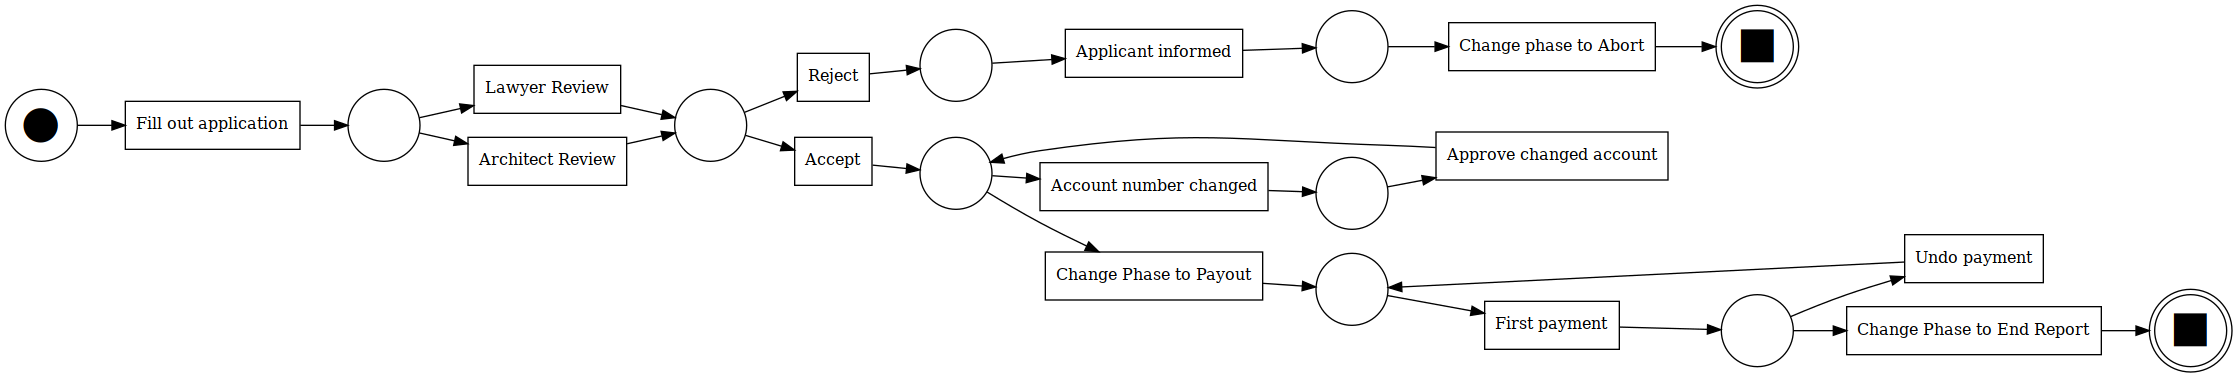

In [3]:
import pandas as pd
import pm4py
from pm4py.objects.petri_net.obj import PetriNet, Marking
from pm4py.objects.petri_net.utils import petri_utils
from pm4py.visualization.petri_net import visualizer as pn_visualizer

# Create a Petri net
net = PetriNet("petri_net_rules_1_to_8")
# Mandatory Assignments 10 #why 10??
# Create transitions
t_fill_out_application = PetriNet.Transition("t_fill_out_application", "Fill out application")
t_architect_review = PetriNet.Transition("t_architect_review", "Architect Review")
t_lawyer_review = PetriNet.Transition("t_lawyer_review", "Lawyer Review")
t_reject = PetriNet.Transition("t_reject", "Reject")
t_applicant_informed = PetriNet.Transition("t_applicant_informed", "Applicant informed")
t_change_phase_to_abort = PetriNet.Transition("t_change_phase_to_abort", "Change phase to Abort")
t_change_phase_to_payout = PetriNet.Transition("t_change_phase_to_payout", "Change Phase to Payout")
t_first_payment = PetriNet.Transition("t_first_payment", "First payment")
t_undo_payment = PetriNet.Transition("t_undo_payment", "Undo payment")
t_change_phase_to_end_report = PetriNet.Transition("t_change_phase_to_end_report", "Change Phase to End Report")
t_account_number_changed = PetriNet.Transition("t_account_number_changed", "Account number changed")
t_approve_changed_account = PetriNet.Transition("t_approve_changed_account", "Approve changed account")
t_execute_abandon = PetriNet.Transition("t_execute_abandon", "Execute abandon")
t_change_phase_to_abandon = PetriNet.Transition("t_change_phase_to_abandon", "Change phase to Abandon")

net.transitions.add(t_fill_out_application)
net.transitions.add(t_architect_review)
net.transitions.add(t_lawyer_review)
net.transitions.add(t_reject)
net.transitions.add(t_applicant_informed)
net.transitions.add(t_change_phase_to_abort)
net.transitions.add(t_change_phase_to_payout)
net.transitions.add(t_first_payment)
net.transitions.add(t_undo_payment)
net.transitions.add(t_change_phase_to_end_report)
net.transitions.add(t_account_number_changed)
net.transitions.add(t_approve_changed_account)
#net.transitions.add(t_execute_abandon)
#net.transitions.add(t_change_phase_to_abandon)

# Create places
p1 = PetriNet.Place("p1")
p2 = PetriNet.Place("p2")
p3 = PetriNet.Place("p3")



net.places.add(p1)
net.places.add(p2)


# Create arcs
petri_utils.add_arc_from_to(p1, t_fill_out_application, net)

petri_utils.add_arc_from_to(t_fill_out_application, p2, net)

# Create a transition, as an opposite to "Reject" as an accepting for the lawyer and architect review
t_accept = PetriNet.Transition("t_accept", "Accept")
net.transitions.add(t_accept)

# Add more places
p4 = PetriNet.Place("p4")
p5 = PetriNet.Place("p5")
p6 = PetriNet.Place("p6")
p7 = PetriNet.Place("p7")
p8 = PetriNet.Place("p8")
p9 = PetriNet.Place("p9")
p10 = PetriNet.Place("p10")
p11 = PetriNet.Place("p11")
p12 = PetriNet.Place("p12")
p13 = PetriNet.Place("p13")

# Adding the places to the petrinet
net.places.add(p3)
net.places.add(p4)
net.places.add(p5)
net.places.add(p6)
net.places.add(p7)
net.places.add(p8)
net.places.add(p9)
net.places.add(p10)
net.places.add(p11)


petri_utils.add_arc_from_to(p2, t_lawyer_review, net)
petri_utils.add_arc_from_to(t_lawyer_review, p3, net)
#petri_utils.add_arc_from_to(p3, t_architect_review2, net)

petri_utils.add_arc_from_to(p2, t_architect_review, net)
petri_utils.add_arc_from_to(t_architect_review, p3, net)

# If rejected:
petri_utils.add_arc_from_to(p3, t_reject, net)
petri_utils.add_arc_from_to(t_reject, p4, net)
petri_utils.add_arc_from_to(p4, t_applicant_informed, net)
petri_utils.add_arc_from_to(t_applicant_informed, p5, net)
petri_utils.add_arc_from_to(p5, t_change_phase_to_abort, net)
petri_utils.add_arc_from_to(t_change_phase_to_abort, p6, net)

# If accepted
petri_utils.add_arc_from_to(p3, t_accept, net)
petri_utils.add_arc_from_to(t_accept, p7, net)

# If AccountNumberChanged
petri_utils.add_arc_from_to(p7, t_account_number_changed, net)
petri_utils.add_arc_from_to(t_account_number_changed, p8, net)
petri_utils.add_arc_from_to(p8, t_approve_changed_account, net)
petri_utils.add_arc_from_to(t_approve_changed_account, p7, net)


# If ChangePhaseToPayout
petri_utils.add_arc_from_to(p7, t_change_phase_to_payout, net)
petri_utils.add_arc_from_to(t_change_phase_to_payout, p9, net)
petri_utils.add_arc_from_to(p9, t_first_payment, net)
petri_utils.add_arc_from_to(t_first_payment, p10, net)
petri_utils.add_arc_from_to(p10, t_change_phase_to_end_report, net)
petri_utils.add_arc_from_to(t_change_phase_to_end_report, p11, net)

# If undo payment
petri_utils.add_arc_from_to(p10, t_undo_payment, net)
petri_utils.add_arc_from_to(t_undo_payment, p9, net)


# Initial and final markings
# TODO: update as needed.
initial_marking = Marking()
initial_marking[p1] = 1

final_marking = Marking()
final_marking[p6] = 1
final_marking[p11] = 2

# Visualize the Petri net
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

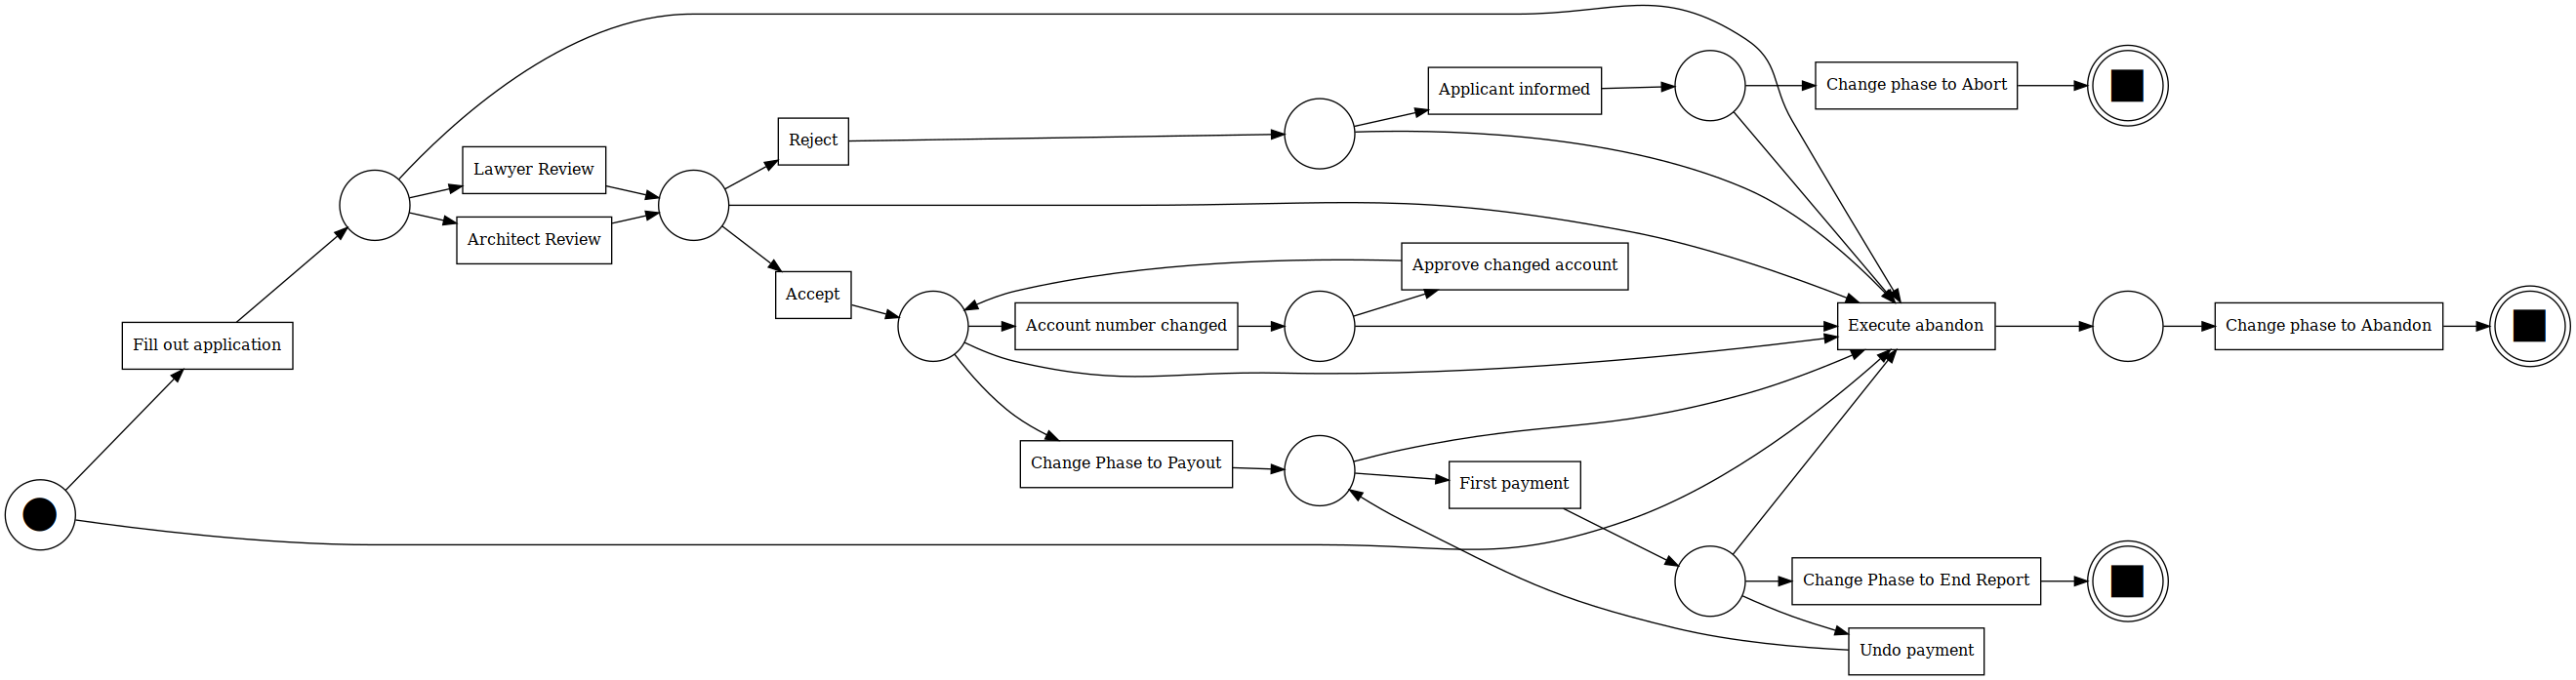

In [4]:
#Add rule 9 to the Petri net
# TODO


net.transitions.add(t_change_phase_to_abandon)
net.transitions.add(t_execute_abandon)

p12 = PetriNet.Place("p12")
net.places.add(p12)
p13 = PetriNet.Place("p13")
net.places.add(p13)

petri_utils.add_arc_from_to(p1, t_execute_abandon, net)
petri_utils.add_arc_from_to(p2, t_execute_abandon, net)
petri_utils.add_arc_from_to(p3, t_execute_abandon, net)
petri_utils.add_arc_from_to(p4, t_execute_abandon, net)
petri_utils.add_arc_from_to(p5, t_execute_abandon, net)
petri_utils.add_arc_from_to(p7, t_execute_abandon, net)
petri_utils.add_arc_from_to(p8, t_execute_abandon, net)

petri_utils.add_arc_from_to(p9, t_execute_abandon, net)
petri_utils.add_arc_from_to(p10, t_execute_abandon, net)

#Should accepting states also point to execute abandon???
#petri_utils.add_arc_from_to(p6, t_execute_abandon, net)
#petri_utils.add_arc_from_to(p11, t_execute_abandon, net)

petri_utils.add_arc_from_to(t_execute_abandon, p12, net)
petri_utils.add_arc_from_to(p12, t_change_phase_to_abandon, net)
petri_utils.add_arc_from_to(t_change_phase_to_abandon, p13, net)

final_marking[p13] = 3

# Visualize the Petri net
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

## Task 2


For each rule describe how the rule is implemented (as a short paragraph for each rule).er Review and Architect Review can not occur unless Fill out appl


These answers will not be tanking into consideration rule 9, except for the explanation of rule 9, since this rule basically make an OR-Split, at almost every place.

**Rule 1:** 
We have p1 as the initial place, with the only outgoing arc being to "Fill out application" transition. 

**Rule 2:**
We have an OR-split from p2. p2 is only accessible from p1 through a sequential route through "Fill out application"

**Rule 3:**
We have an OR-split at p2, leading to either lawyer review, or architect review, but never both.

**Rule 4:**
After "Reject" we have a sequential route A -> B -> C, with arcs going p6 -> "Applicant informed" -> p7 -> "Change phase to Abort" -> p8, with p8 being an accepting place.

**Rule 5:**
After "First payment" the place have an OR-split" either going to "Undo payment", which leads back to the place before "First payment", or going to "Change phase to End Report"

**Rule 6:**
After the OR-split at p9, going to "Account number changed" follows a sequential route through "Approved changed account", leading back to p9, first allowing "First payment" after "Approved changed account"

**Rule 7:**
"Change phase payout" is the other side of the OR-split, where the other arc goes to "Undo payment", leading back to "First Payment"

**Rule 8:**
For "Change phase to end report" after both "Change phase to payout" and "First Payment" through a sequential route.

**Rule 9:**
This rule make an OR-split at every place, except for at the accepting places, and after "Execute Abandon".
We have it made such that: "Execute Abandon" -> p13 -> "Change phase to abandon" -> p14, with p14 being an accepting place.


## Task 3

Answer the following questions and add a short (1 paragraph) argument for your answer:

**Is your Petri net live and/or quasi-live?**

Our Petri net is quasi-live, since from the initial place, every single transition is reachable. 
The net is not live, since from every place, not every transition is reachable.

**Is your Petri net bounded and/or safe?**

The Petri net is safe, and this also bounded. Since, there are no AND-splits in any loops, and our only splits are OR-splits

**Is your Petri net a WorkFlow net?**

It is not a WorkFlow net, since for it to be a WorkFlow net, since it has multiple final places, and one of the conditions for  WorkFlow nets are there need to be only 1 starting place, and 1 final place-

# Part 2: Modelling Event Patterns as DCR Graphs

## Task 1

Model the rules from part 1 as individual DCR Graphs. (Yielding 9 graphs in total.)  Write a short description for each explaining the semantics. For convenience you may want to use an “other” event in some of your models that represents all events not explicitly mentioned.

Graph 1:


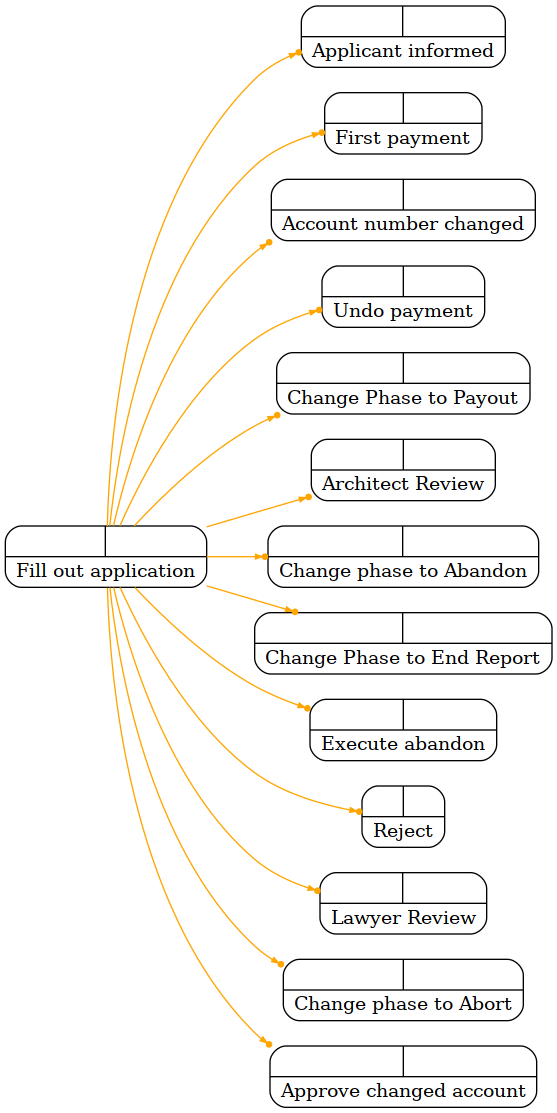

Graph 2:


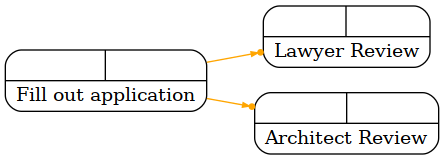

Graph 3:


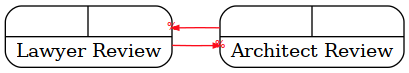

Graph 4:


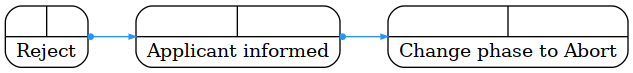

Graph 5:


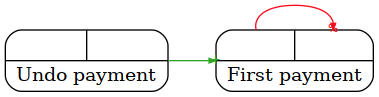

Graph 6:


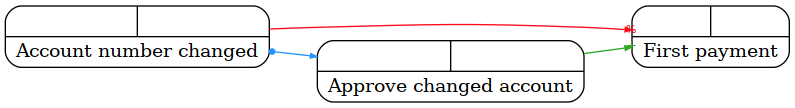

Graph 7:


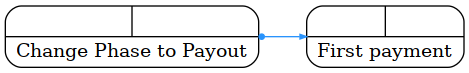

Graph 8:


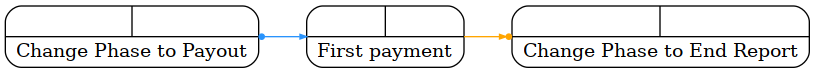

Graph 9:


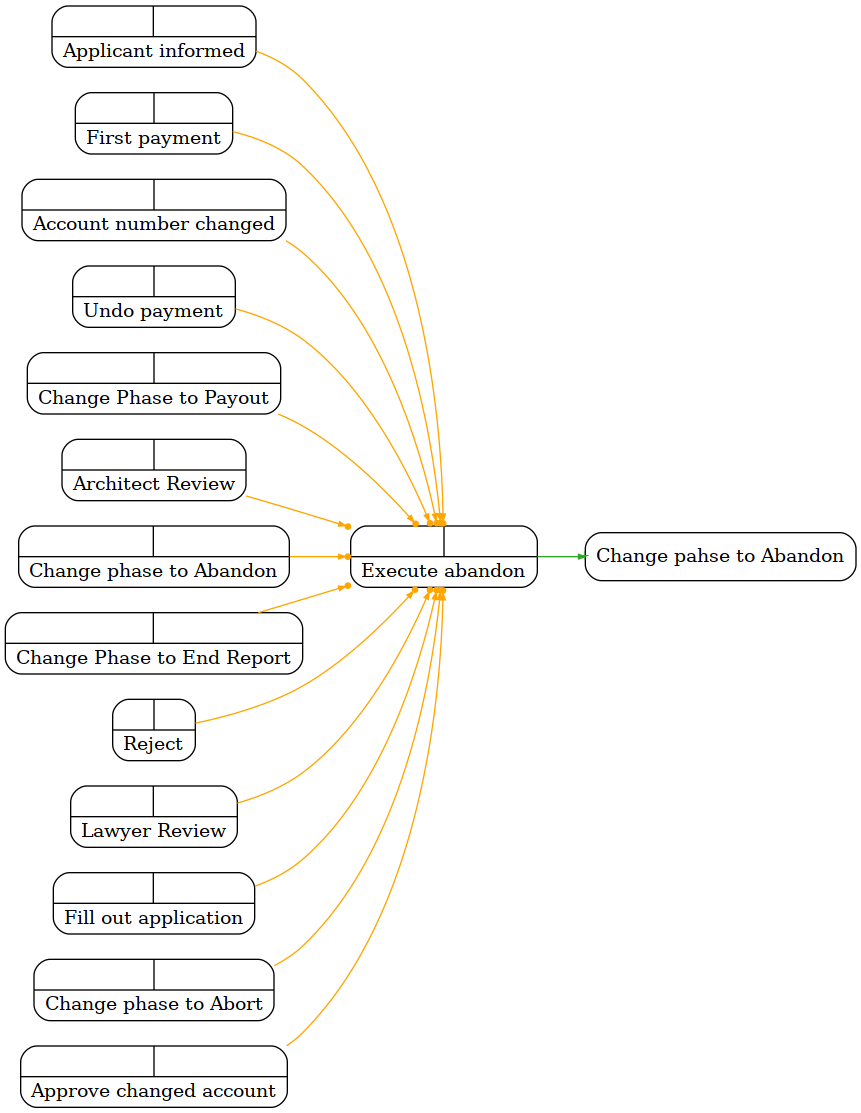

In [5]:
# Repeat this code block 9 times, once for each pattern

# Graph 1
from pm4py.objects.dcr.obj import DcrGraph

def Graph1():
    graph = DcrGraph()

    events = [
        "Fill out application", "Architect Review", "Lawyer Review", "Reject", 
        "Applicant informed", "Change phase to Abort", "Change Phase to Payout", 
        "First payment", "Undo payment", "Change Phase to End Report", 
        "Account number changed", "Approve changed account", "Execute abandon", 
        "Change phase to Abandon"
    ]

    for event in events:
        graph.events.add(event)
        graph.labels.add(event)
        graph.label_map[event] = event

    for event in graph.events:
        graph.marking.included.add(event)

    for event in events:
        if event != "Fill out application":
            graph.conditions[event] = {"Fill out application"}

    pm4py.view_dcr(graph)

# Graph 2
def Graph2():
    graph = DcrGraph()

    events = [
        "Fill out application", "Architect Review", "Lawyer Review"
    ]

    for event in events:
        graph.events.add(event)
        graph.labels.add(event)
        graph.label_map[event] = event

    for event in graph.events:
        graph.marking.included.add(event)

    graph.conditions["Lawyer Review"] = {"Fill out application"}
    graph.conditions["Architect Review"] = {"Fill out application"}

    pm4py.view_dcr(graph)

# Graph 3
def Graph3():
    graph = DcrGraph()

    events = [
        "Architect Review", "Lawyer Review"
    ]

    for event in events:
        graph.events.add(event)
        graph.labels.add(event)
        graph.label_map[event] = event

    for event in graph.events:
        graph.marking.included.add(event)

    graph.excludes["Lawyer Review"] = {"Architect Review"}
    graph.excludes["Architect Review"] = {"Lawyer Review"}

    pm4py.view_dcr(graph)

# Graph 4
def Graph4():
    graph = DcrGraph()

    events = [
        "Reject", "Applicant informed", "Change phase to Abort"
    ]

    for event in events:
        graph.events.add(event)
        graph.labels.add(event)
        graph.label_map[event] = event

    for event in graph.events:
        graph.marking.included.add(event)
        graph.responses[event] = set()


    graph.responses["Reject"] = {"Applicant informed"}
    graph.responses["Applicant informed"] = {"Change phase to Abort"}

    pm4py.view_dcr(graph)

# Graph 5
def Graph5():
    graph = DcrGraph()

    events = [
        "First payment", "Undo payment"
    ]

    for event in events:
        graph.events.add(event)
        graph.labels.add(event)
        graph.label_map[event] = event

    for event in graph.events:
        graph.marking.included.add(event)

    graph.excludes["First payment"] = {"First payment"}
    graph.includes["Undo payment"] = {"First payment"} # Why is the order switched?

    pm4py.view_dcr(graph)

# Graph 6
def Graph6():
    graph = DcrGraph()

    events = [
        "Account number changed", "Approve changed account", "First payment"
    ]

    for event in events:
        graph.events.add(event)
        graph.labels.add(event)
        graph.label_map[event] = event

    for event in graph.events:
        graph.marking.included.add(event)

    graph.responses["Account number changed"] = {"Approve changed account"}
    graph.excludes["Account number changed"] = {"First payment"}
    graph.includes["Approve changed account"] = {"First payment"}

    pm4py.view_dcr(graph)

# Graph 7
def Graph7():
    graph = DcrGraph()

    events = [
        "Change Phase to Payout", "First payment"
    ]

    for event in events:
        graph.events.add(event)
        graph.labels.add(event)
        graph.label_map[event] = event

    for event in graph.events:
        graph.marking.included.add(event)

    graph.responses["Change Phase to Payout"] = {"First payment"}

    pm4py.view_dcr(graph)

# Graph 8
def Graph8():
    graph = DcrGraph()

    events = [
        "Change Phase to Payout", "Change Phase to End Report", "First payment"
    ]

    for event in events:
        graph.events.add(event)
        graph.labels.add(event)
        graph.label_map[event] = event

    for event in graph.events:
        graph.marking.included.add(event)

    graph.conditions["Change Phase to End Report"] = {"First payment"}
    graph.responses["Change Phase to Payout"] = {"First payment"}

    pm4py.view_dcr(graph)

# Graph 9
def Graph9():
    graph = DcrGraph()

    events = [
        "Fill out application", "Architect Review", "Lawyer Review", "Reject", 
        "Applicant informed", "Change phase to Abort", "Change Phase to Payout", 
        "First payment", "Undo payment", "Change Phase to End Report", 
        "Account number changed", "Approve changed account", "Execute abandon", 
        "Change phase to Abandon"
    ]

    for event in events:
        graph.events.add(event)
        graph.labels.add(event)
        graph.label_map[event] = event

    for event in graph.events:
        graph.marking.included.add(event)
        graph.conditions[event] = set()


    for event in events:
        if event != "Execute abandon":
            graph.conditions["Execute abandon"].add(event)
    graph.includes["Execute abandon"] = {"Change pahse to Abandon"}

    pm4py.view_dcr(graph)



#Draw all graphs
print("Graph 1:")
Graph1()

print("Graph 2:")
Graph2()

print("Graph 3:")
Graph3()

print("Graph 4:")
Graph4()

print("Graph 5:")
Graph5()

print("Graph 6:")
Graph6()

print("Graph 7:")
Graph7()

print("Graph 8:")
Graph8()

print("Graph 9:")
Graph9()



## Task 2

Combine the separate patterns into a single model.

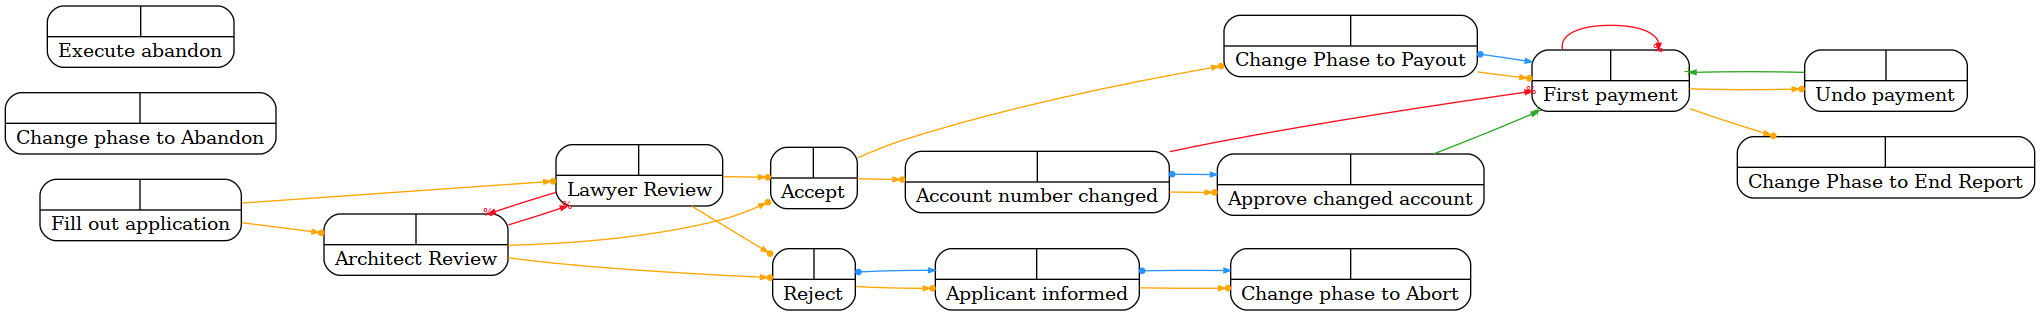

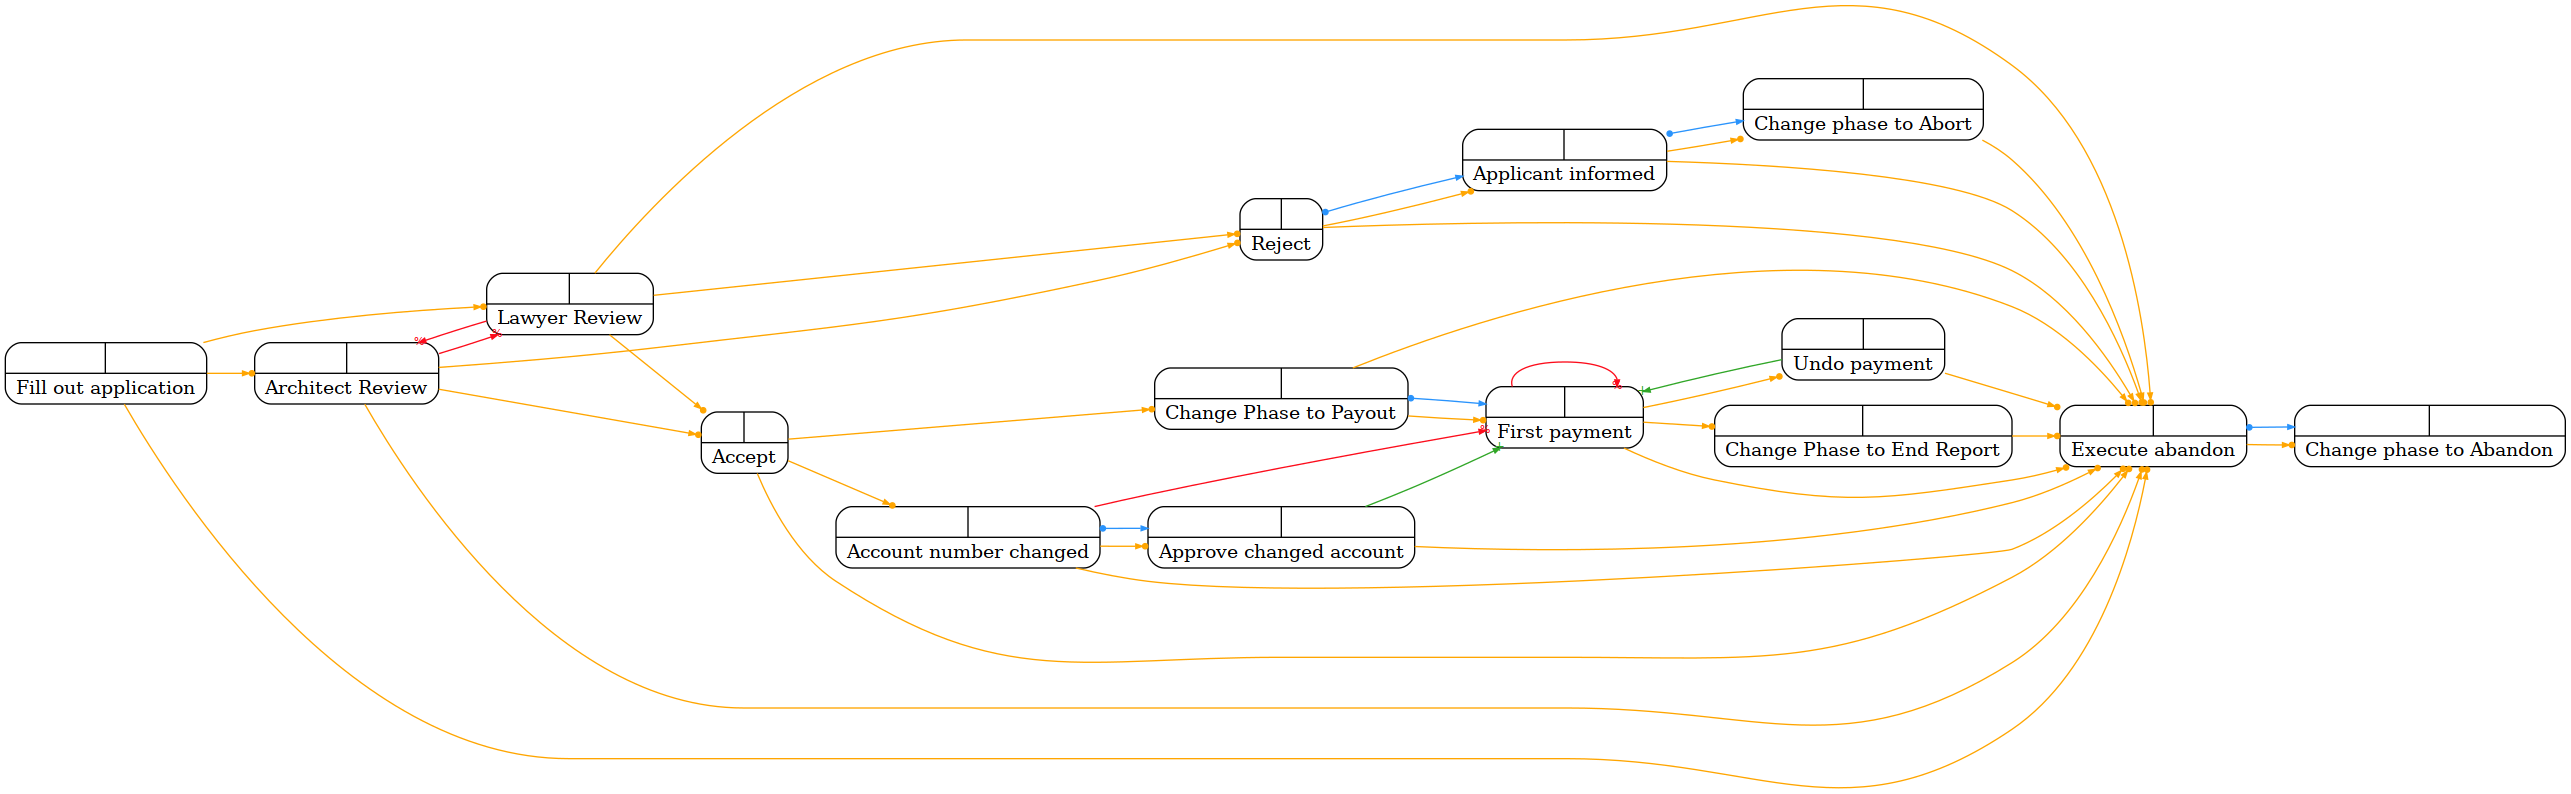

In [17]:
# Add your code here
from pm4py.objects.dcr.obj import DcrGraph
graph = DcrGraph()

events = [
    "Fill out application", "Architect Review", "Lawyer Review", "Reject", 
    "Applicant informed", "Change phase to Abort", "Change Phase to Payout", 
    "First payment", "Undo payment", "Change Phase to End Report", 
    "Account number changed", "Approve changed account", "Execute abandon", 
    "Change phase to Abandon", "Accept"
]

for event in events:
    graph.events.add(event)
    graph.labels.add(event)
    graph.label_map[event] = event

for event in graph.events:
    graph.marking.included.add(event)
    graph.conditions[event] = set()
    graph.responses[event] = set()

graph.conditions["Lawyer Review"] = {"Fill out application"}
graph.conditions["Architect Review"] = {"Fill out application"}

graph.excludes["Lawyer Review"] = {"Architect Review"}
graph.excludes["Architect Review"] = {"Lawyer Review"}

graph.responses["Reject"] = {"Applicant informed"}
graph.responses["Applicant informed"] = {"Change phase to Abort"}
graph.conditions["Applicant informed"] = {"Reject"}
graph.conditions["Change phase to Abort"] = {"Applicant informed"}


graph.excludes["First payment"] = {"First payment"}
graph.conditions["Undo payment"] = {"First payment"} # Right order???
graph.includes["Undo payment"] = {"First payment"}

graph.responses["Account number changed"] = {"Approve changed account"}
graph.conditions["Approve changed account"] = {"Account number changed"}
graph.excludes["Account number changed"] = {"First payment"}
graph.includes["Approve changed account"] = {"First payment"}

graph.responses["Change Phase to Payout"] = {"First payment"}

graph.conditions["Change Phase to End Report"] = {"First payment"}
graph.responses["Change Phase to Payout"] = {"First payment"}
graph.conditions["First payment"] = {"Change Phase to Payout"}

graph.conditions["Accept"].add("Lawyer Review")
graph.conditions["Accept"].add("Architect Review")
graph.conditions["Reject"].add("Lawyer Review")
graph.conditions["Reject"].add("Architect Review")

graph.conditions["Change Phase to Payout"].add("Accept")
graph.conditions["Account number changed"].add("Accept")

pm4py.view_dcr(graph)

for event in events:
    if event != "Execute abandon" and event != "Change phase to Abandon":
        graph.conditions["Execute abandon"].add(event)
graph.responses["Execute abandon"] = {"Change phase to Abandon"}
graph.conditions["Change phase to Abandon"] = {"Execute abandon"}

pm4py.view_dcr(graph)

## Task 3

Answer the following questions:

**Which relations did you not use in your models?**
The only one we didnt use is the "Milestone relation (purple)", the main reason was it not existing in the DCR4PY module.
However, through the combination of conditions and responses (as evident in graph 8), we can safely assume that "... change phase to end report should not happen before first payment." is implicitly done. 

**Could some of the rules have been modelled in more than one way? If so, give one or two examples.**
Another way to model the rules is to forego the extra activity "accept" and just have conditionals go directly from both reviews to "Account number changed" and "Change phase to Payout"

**How does your model differ from the Petri net? Do they exhibit the same language?**

